In [1]:
from Engine import Engine
from Environment import Environment

2023-11-02 12:32:02.695090: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 12:32:02.739372: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-02 12:32:02.739404: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-02 12:32:02.739444: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-02 12:32:02.747819: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 12:32:02.748707: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

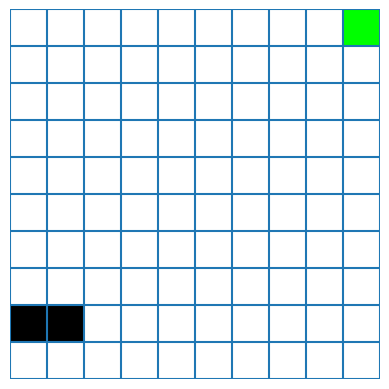

In [10]:
size = (10,10)
goal_reward  = 100
fail_penalty = -10
time_penalty = -1
outOfBoundsList = [(0,1),(1,1)]
goalList = [(9,9)]

env = Environment(size,goal_reward,fail_penalty,time_penalty,outOfBoundsList,goalList)
engine = Engine(env)

env.display()

In [11]:
engine.train(10,gamma = .99)

Iteration:0, Avg Q-val:-7.802605555555555
Iteration:1, Avg Q-val:-9.363051805555557
Iteration:2, Avg Q-val:-9.336692313055556
Iteration:3, Avg Q-val:-8.498197539730556
Iteration:4, Avg Q-val:-7.505426900040057
Iteration:5, Avg Q-val:-6.408346287002223
Iteration:6, Avg Q-val:-5.493653863074318
Iteration:7, Avg Q-val:-4.693965096203818
Iteration:8, Avg Q-val:-4.055056669781927
Iteration:9, Avg Q-val:-4.045921497307091


In [14]:
engine.run((0,9,0,0))

(array([[ 0,  9,  0,  0],
        [ 1,  8,  1, -1],
        [ 3,  7,  2, -1],
        [ 6,  7,  3,  0],
        [ 8,  8,  2,  1],
        [ 9,  9,  1,  1]]),
 array([[ 1, -1],
        [ 1,  0],
        [ 1,  1],
        [-1,  1],
        [-1,  0]]))